In [229]:
import numpy as np
import pandas as pd
import math
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from itertools import combinations
import random as rn 
from statsmodels.graphics.regressionplots import plot_leverage_resid2, influence_plot
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

### Получаем датафрейм для работы 

In [123]:
data = pd.read_csv('General_Table_3.csv', sep = ';',index_col=False)
test = pd.read_csv('General_Table_4.csv', sep = ';',index_col=False)

In [230]:
#объекты, для которых нужно построить предсказательную модель
test

,Unnamed: 0,Object,Square,Place,Material,Finish,Otd_Vstr,Transport,Otopl,Nazn
0,1,Object 1,494.5,3,1,2,1,5,1,3
1,2,Object 2,298.5,3,1,2,1,5,1,3
2,3,Object 3,8.0,3,1,2,1,5,1,1
3,4,Object 4,361.1,3,1,2,1,5,1,3
4,5,Object 5,1755.6,3,1,2,1,5,1,3
5,6,Object 6,316.4,3,1,2,1,5,1,3
6,7,Object 7,587.1,3,1,2,1,5,1,3
7,8,Object 8,4698.7,2,1,2,1,3,1,3


In [224]:
#что представляют собой данные
data.head(5)

,Unnamed: 0,Object,Square,Place,Material,Finish,Otd_Vstr,Transport,Otopl,Nazn,ValueForSquareMetre
0,1,Analog 1,300,2,1,3,1,3,1,3,211.60
1,2,Analog 2,300,1,0,1,1,1,0,2,61.33
2,3,Analog 3,510,2,1,2,1,1,1,3,153.33
3,4,Analog 4,150,4,1,1,0,4,1,2,276.00
4,5,Analog 5,1000,2,0,2,1,2,1,2,184.00


In [102]:
#data[0] - количество аналогов, data[1] - количество признаков
data.shape

(39, 11)

In [103]:
#таблица корреляций признаков между собой
data.corr()

,Unnamed: 0,Square,Place,Material,Finish,Otd_Vstr,Transport,Otopl,Nazn,ValueForSquareMetre
Unnamed: 0,1.000000,0.138855,0.103908,0.309409,-0.071561,-0.068551,0.153542,-0.071240,-0.271584,-0.089716
Square,0.138855,1.000000,-0.352562,0.054654,-0.122120,0.259241,-0.302166,-0.157061,-0.026056,-0.237734
Place,0.103908,-0.352562,1.000000,0.075378,0.177967,-0.109109,0.861164,0.259851,0.102379,0.551273
Material,0.309409,0.054654,0.075378,1.000000,0.050082,-0.252215,0.136843,0.170941,0.308683,0.322106
Finish,-0.071561,-0.122120,0.177967,0.050082,1.000000,0.041425,0.236930,0.390138,0.346585,0.401459
Otd_Vstr,-0.068551,0.259241,-0.109109,-0.252215,0.041425,1.000000,-0.066026,-0.298985,0.153903,-0.371054
Transport,0.153542,-0.302166,0.861164,0.136843,0.236930,-0.066026,1.000000,0.271608,0.227163,0.567327
Otopl,-0.071240,-0.157061,0.259851,0.170941,0.390138,-0.298985,0.271608,1.000000,0.296665,0.670720
Nazn,-0.271584,-0.026056,0.102379,0.308683,0.346585,0.153903,0.227163,0.296665,1.000000,0.382345
ValueForSquareMetre,-0.089716,-0.237734,0.551273,0.322106,0.401459,-0.371054,0.567327,0.670720,0.382345,1.000000


# Работа со всеми признаками 

In [312]:
#размер листа равен количеству столбцов в матрице в данными
list = range(data.shape[0])

In [313]:
rn.seed(5)
for i in range(10000):#сколько регрессионных моделей будет построено
    people_number = rn.randint(20, 27) #количество аналогов в каждой из построенных моделей
    combin = rn.sample(list,people_number) #комбинация из people_number аналогов (рандомные позиции в исходном датафрейме)
    random_dataframe = pd.DataFrame(data=data.ix[combin,])# составленный датафрейм поданный на обучение
    m1 = smf.ols('ValueForSquareMetre ~ Square + Place + Material + Finish + Otd_Vstr + Transport + Otopl + Nazn', data=random_dataframe)
    fitted = m1.fit()
    if (fitted.rsquared >= 0.8 and fitted.params['Square'] < 0 and fitted.params['Place'] > 0 and fitted.params['Material'] > 0 and 
        fitted.params['Transport'] > 0 and fitted.params['Otopl'] > 0 and fitted.params['Finish'] > 0 and fitted.params['Nazn'] > 0 and
        fitted.params['Otd_Vstr'] > 0 and np.all(np.array(fitted.params['Intercept'] + fitted.params['Square']*test['Square'] + fitted.params['Place']*test['Place'] + 
        fitted.params['Material']*test['Material'] + fitted.params['Transport']*test['Transport'] + fitted.params['Otopl']*test['Otopl'] + fitted.params['Nazn']*test['Nazn'] + fitted.params['Finish']*test['Finish'] + 
        fitted.params['Otd_Vstr']*test['Otd_Vstr']).reshape(-1,1) < 270) and np.all(np.array(fitted.params['Intercept'] + fitted.params['Square']*test['Square'] + fitted.params['Place']*test['Place'] + 
        fitted.params['Material']*test['Material'] + fitted.params['Transport']*test['Transport'] + fitted.params['Otopl']*test['Otopl'] + fitted.params['Nazn']*test['Nazn'] + fitted.params['Finish']*test['Finish'] + 
        fitted.params['Otd_Vstr']*test['Otd_Vstr']).reshape(-1,1)) > 0):
        m2 = smf.ols('np.log(ValueForSquareMetre) ~ Square + Place + Material + Finish + Otd_Vstr + Transport + Otopl + Nazn', data=random_dataframe)
        fitted_second = m2.fit()
        if (fitted_second.rsquared >= 0.7 and math.exp(fitted_second.params['Square']) < 1 and math.exp(fitted_second.params['Place']) > 1 
            and math.exp(fitted_second.params['Material']) > 1 and math.exp(fitted_second.params['Transport']) > 1 and 
            math.exp(fitted_second.params['Otopl']) > 1 and math.exp(fitted_second.params['Finish']) > 1 and math.exp(fitted_second.params['Nazn']) > 1 and
            math.exp(fitted_second.params['Otd_Vstr']) > 1 and np.all(math.exp(fitted_second.params['Intercept'])*  
            math.exp(fitted_second.params['Square'])**test['Square'] * math.exp(fitted_second.params['Place'])**test['Place'] * 
            math.exp(fitted_second.params['Material'])**test['Material'] * math.exp(fitted_second.params['Transport'])**test['Transport'] * 
            math.exp(fitted_second.params['Otopl'])**test['Otopl'] * math.exp(fitted_second.params['Nazn'])**test['Nazn'] * 
            math.exp(fitted_second.params['Finish'])**test['Finish'] * math.exp(fitted_second.params['Otd_Vstr'])**test['Otd_Vstr']) < 250 and np.all(math.exp(fitted_second.params['Intercept'])*  
            math.exp(fitted_second.params['Square'])**test['Square'] * math.exp(fitted_second.params['Place'])**test['Place'] * 
            math.exp(fitted_second.params['Material'])**test['Material'] * math.exp(fitted_second.params['Transport'])**test['Transport'] * 
            math.exp(fitted_second.params['Otopl'])**test['Otopl'] * math.exp(fitted_second.params['Nazn'])**test['Nazn'] * 
            math.exp(fitted_second.params['Finish'])**test['Finish'] * math.exp(fitted_second.params['Otd_Vstr'])**test['Otd_Vstr']) > 0):
            print(random_dataframe)
            print(fitted.summary())
            print(fitted_second.summary())
            break

    Unnamed: 0     Object  Square  Place  Material  Finish  Otd_Vstr  \
36          37  Analog 37     315      2         1       1         0   
8            9   Analog 9     260      3         0       2         1   
0            1   Analog 1     300      2         1       3         1   
25          26  Analog 26     250      3         1       1         1   
10          11  Analog 11      84      2         1       1         1   
7            8   Analog 8     400      2         1       2         0   
33          34  Analog 34     350      2         1       3         0   
20          21  Analog 21    1000      3         1       2         1   
17          18  Analog 18     450      1         0       1         1   
29          30  Analog 30     350      2         1       3         0   
13          14  Analog 14     215      3         1       2         0   
9           10  Analog 10     800      1         1       2         1   
19          20  Analog 20     300      2         1       2      

In [314]:
#количество аналогов в построенной модели
random_dataframe['Object'].shape

(24,)

In [315]:
# предсказания по линейной модели
print(fitted.params['Intercept'] + fitted.params['Square']*test['Square'] + fitted.params['Transport']*test['Transport'] + 
      fitted.params['Place']*test['Place'] + fitted.params['Material']*test['Material'] + 
      fitted.params['Otopl']*test['Otopl']+ fitted.params['Nazn']*test['Nazn'] +
      fitted.params['Finish']*test['Finish'] + fitted.params['Otd_Vstr']*test['Otd_Vstr'])

0    243.230231
1    258.454420
2    250.353411
3    253.592000
4    145.275001
5    257.064048
6    236.037578
7   -112.497436
dtype: float64


In [348]:
#предсказания по экспоненциальной модели
print(math.exp(fitted_second.params['Intercept'])*math.exp(fitted_second.params['Square'])**test['Square']*math.exp(fitted_second.params['Transport'])**test['Transport']*math.exp(fitted_second.params['Place'])**test['Place']*math.exp(fitted_second.params['Material'])**test['Material']*math.exp(fitted_second.params['Otopl'])**test['Otopl']*math.exp(fitted_second.params['Nazn'])**test['Nazn']*math.exp(fitted_second.params['Finish'])**test['Finish']*math.exp(fitted_second.params['Otd_Vstr'])**test['Otd_Vstr']) 

0    233.407417
1    247.663493
2    258.494820
3    243.018093
4    159.386501
5    246.326183
6    226.960536
7     54.412589
dtype: float64


Посмотрим на наблюдения, которые сильно влияют на регрессионное уравнение --> это индексы аналогов(т.е. чтобы получить сами аналоги нужно к индексу прибавить 1)

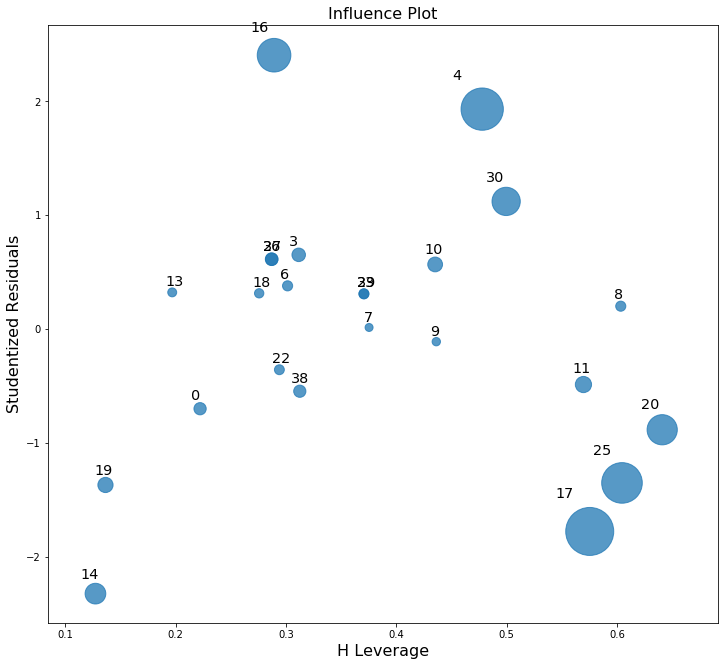

In [319]:
plt.figure(figsize(12,11))
influence_plot(fitted, alpha=1)
pylab.show()

In [321]:
#сохранить результаты в файл analogs.txt
np.savetxt(r'./analogs.txt', random_dataframe['Object'], fmt='%5s')

###  Попытка уменьшение размерности исходных даных


In [323]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(data.iloc[:,2:-1])

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [324]:
pca.explained_variance_ratio_

array([  9.99987710e-01,   7.56723465e-06,   2.05582649e-06,
         1.06471913e-06,   7.07723373e-07,   4.29758033e-07,
         2.59863621e-07,   2.04716800e-07])

Видим что одна площадь объясняет почти всю дисперсию данных

In [354]:
m_pca = smf.ols('np.log(ValueForSquareMetre) ~ Square', data=data[['ValueForSquareMetre', 'Square']])
fitted_pca = m_pca.fit()
print(math.exp(fitted_second.params['Intercept'])*math.exp(fitted_second.params['Square'])**test['Square'])

0    50.566624
1    53.655135
2    58.583125
3    52.648731
4    34.530339
5    53.365414
6    49.169937
7    14.176973
Name: Square, dtype: float64


# Работа с частью признаков

In [305]:
def transform(data):
    list_of_features = []
    column = None
    for _ in range(100):
        column = input("Enter feature ")
        if (column != 'end'):
            list_of_features.append(column)
            data_fixed = data[list_of_features]
        else:
            break
    return data_fixed

In [306]:
data.head(4)

,Unnamed: 0,Object,Square,Place,Material,Finish,Otd_Vstr,Transport,Otopl,Nazn,ValueForSquareMetre
0,1,Analog 1,300,2,1,3,1,3,1,3,211.60
1,2,Analog 2,300,1,0,1,1,1,0,2,61.33
2,3,Analog 3,510,2,1,2,1,1,1,3,153.33
3,4,Analog 4,150,4,1,1,0,4,1,2,276.00


In [307]:
data_fixed = transform(data)

Enter feature Object
Enter feature Square
Enter feature Place
Enter feature ValueForSquareMetre
Enter feature end


In [308]:
data_fixed.head(10)

,Object,Square,Place,ValueForSquareMetre
0,Analog 1,300,2,211.60
1,Analog 2,300,1,61.33
2,Analog 3,510,2,153.33
3,Analog 4,150,4,276.00
4,Analog 5,1000,2,184.00
5,Analog 6,200,2,257.60
6,Analog 7,200,3,276.00
7,Analog 8,400,2,211.60
8,Analog 9,260,3,123.85
9,Analog 10,800,1,73.60


## Посотрим на корреляция признаков между собой

In [309]:
data_fixed.corr()

,Square,Place,ValueForSquareMetre
Square,1.000000,-0.352562,-0.237734
Place,-0.352562,1.000000,0.551273
ValueForSquareMetre,-0.237734,0.551273,1.000000


## Создаем лист из чисел(индексация начинается с нуля)

In [298]:
#размер листа равен количеству столбцов в матрице в данными
list = range(data.shape[0])

## Собственно само тело функции

In [338]:
seed = rn.random()
for i in range(100000):
    rn.seed(seed)
    seed += 1
    people_number = rn.randint(15, 25)
    combin = rn.sample(list,people_number)
    random_dataframe_part = pd.DataFrame(data=data_fixed.ix[combin,])#датафрейм в обучении 
    m1_part = smf.ols('ValueForSquareMetre ~ Square + Place ', data=random_dataframe_part)
    fitted_part = m1_part.fit()
    #print(fitted_part.rsquared)#del
    #print(fitted.params)
    if (fitted_part.rsquared >= 0.7 and fitted_part.params['Place'] > 0 and fitted_part.params['Square'] < 0 and np.all(np.array(fitted_part.params['Intercept'] + fitted_part.params['Square']*test['Square'] + fitted_part.params['Place']*test['Place']).reshape(-1,1) < 1000) and 
        np.all(np.array(fitted_part.params['Intercept'] + fitted_part.params['Square']*test['Square'] + fitted_part.params['Place']*test['Place']).reshape(-1,1) > 0)):
        m2_part = smf.ols('np.log(ValueForSquareMetre) ~ Square + Place', data=random_dataframe_part)
        fitted_second_part = m2_part.fit()

        if (fitted_second_part.rsquared >= 0.7 and math.exp(fitted_second_part.params['Place']) > 1 and math.exp(fitted_second_part.params['Square']) < 1 and np.all(math.exp(fitted_second_part.params['Intercept'])*  
            math.exp(fitted_second_part.params['Square'])**test['Square']*math.exp(fitted_second_part.params['Place'])**test['Place']) < 1000 and
            np.all(math.exp(fitted_second_part.params['Intercept'])*math.exp(fitted_second_part.params['Square'])*test['Square']**math.exp(fitted_second_part.params['Place'])**test['Place'])>0):
            print(random_dataframe_part)
            print(fitted_part.summary())
            print(fitted_second_part.summary())
            break

       Object  Square  Place  ValueForSquareMetre
36  Analog 37     315      2               192.76
20  Analog 21    1000      3               184.00
15  Analog 16     117      4               353.85
30  Analog 31     800      1                74.75
1    Analog 2     300      1                61.33
19  Analog 20     300      2               153.33
2    Analog 3     510      2               153.33
17  Analog 18     450      1                92.00
4    Analog 5    1000      2               184.00
28  Analog 29     700      3               318.06
14  Analog 15     300      3               153.33
16  Analog 17      93      3               346.24
38  Analog 39     800      2               174.80
7    Analog 8     400      2               211.60
31  Analog 32     150      3               276.00
                             OLS Regression Results                            
Dep. Variable:     ValueForSquareMetre   R-squared:                       0.746
Model:                             OLS  

## Параметры регрессионной модели + расчет для обьекта

In [351]:
print(fitted_part.params['Intercept'] + fitted_part.params['Square']*test['Square'] + fitted_part.params['Place']*test['Place'])

0    257.986069
1    264.836130
2    274.988899
3    262.648304
4    213.911518
5    264.210537
6    254.749765
7     24.980509
dtype: float64


In [353]:
print(math.exp(fitted_second_part.params['Intercept'])*math.exp(fitted_second_part.params['Square'])**test['Square']*math.exp(fitted_second_part.params['Place'])**test['Place']) 

0    253.078663
1    253.959008
2    255.269441
3    253.677504
4    247.486891
5    253.878482
6    252.663807
7    140.546409
dtype: float64


## Тест Фишера, проверяет нулевую гипотезу о том что все коэффициенты перед признаками в регрессионной модели можно положить равными нулю.

In [252]:
print(fitted.f_test('Square = Place = Material = Finish = Otd_Vstr = Transport = Otopl = Nazn = 0'))
# в данном случае для модели F-статистика Фишера равна 8.2922 - модель значима

<F test: F=array([[ 8.29226718]]), p=0.00025880274907412535, df_denom=15, df_num=8>


In [272]:
print(fitted.f_test('Place = Material = Finish = Otd_Vstr = Transport = 0'))
#на уровне значимости 0.05 можно отвергнуть нулевую гипотезу о том, что модель статистически значима.

<F test: F=array([[ 1.36927518]]), p=0.2903856324930016, df_denom=15, df_num=5>
